In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/finalProject
!cp /content/drive/MyDrive/finalProject/cuda_IndRNN_onlyrecurrent.py /content
!cp /content/drive/MyDrive/finalProject/Indrnn_densenet.py /content
!cp /content/drive/MyDrive/finalProject/IndRNN_onlyrecurrent.py /content
!cp /content/drive/MyDrive/finalProject/indrnn.py /content

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/finalProject


###imports

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
from indrnn import IndRNNv2
from indrnn import IndRNN
import argparse

###graph

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plotArray(arr):
  x=np.arange(0, len(arr))
  y=arr
  plt.title("Line graph")
  plt.xlabel("X axis")
  plt.ylabel("Y axis")
  plt.plot(x, y, color ="red")
  plt.show()
def into_graph(two_d_arr):
  for i in range(len(two_d_arr)):
    plotArray(two_d_arr[i])

In [ ]:
def create_plot(arr,color,name):
  x=np.arange(0, len(arr))
  y=arr
  plt.xlabel("step")
  plt.ylabel("Score")
  plt.plot(x, y, color =color,label=name)


###load data

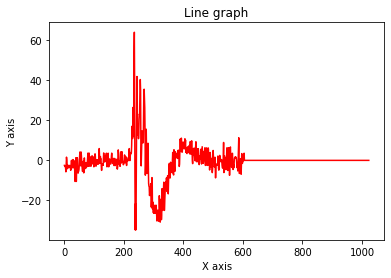

In [ ]:
#TEST
ARR=[
-2.502436639999999990e+00,-2.511298179999999824e+00,-3.065681459999999969e+00,-2.917245630000000034e+00,-3.988899949999999972e+00,-5.728759290000000171e+00,-2.254028799999999944e+00,1.604656700000000047e+00,2.323958130000000066e-01,-2.346296070000000178e+00,-4.170930389999999655e+00,-3.599788189999999943e+00,-2.490435600000000083e+00,-3.085383649999999811e+00,-3.597461459999999889e+00,-2.625307079999999793e+00,-2.490435600000000083e+00,-3.085383649999999811e+00,-3.597461459999999889e+00,-2.625307079999999793e+00,-2.620369909999999969e+00,-4.980332849999999922e+00,-4.330685139999999933e+00,-3.783844410000000158e-01,-1.437827390000000032e-02,-1.274017210000000011e+00,-2.742908240000000220e+00,-3.662452459999999910e+00,-4.223418239999999768e-01,3.938488359999999799e-01,-3.686849360000000075e+00,-3.554679629999999868e+00,-1.774540990000000040e-01,-3.979090750000000010e-01,-1.971811289999999994e+00,-7.766339780000000026e+00,-1.055473139999999965e+01,-4.742561819999999706e+00,1.666054869999999966e-01,1.352528689999999978e+00,-1.055473139999999965e+01,-4.742561819999999706e+00,1.666054869999999966e-01,1.352528689999999978e+00,6.034157869999999813e-01,-4.233051780000000264e+00,-6.381453989999999798e+00,-5.309863570000000088e+00,-5.375402929999999913e+00,-4.493191719999999556e+00,-2.222881319999999938e+00,1.790476560000000106e+00,4.184463499999999669e+00,2.447181940000000111e+00,-8.535397049999999819e-01,-2.757743839999999835e+00,4.184463499999999669e+00,2.447181940000000111e+00,-8.535397049999999819e-01,-2.757743839999999835e+00,-4.401417259999999665e+00,-5.553286080000000347e+00,-3.903214220000000179e+00,-4.461784360000000116e-01,-1.705364349999999973e+00,-6.263812070000000176e+00,-2.799226280000000067e+00,1.219393369999999921e+00,-1.503658890000000081e+00,-1.399117949999999944e+00,-1.300913100000000044e+00,-4.090200420000000392e+00,-2.201535699999999984e+00,-1.102677109999999905e+00,-2.077266929999999956e+00,-3.239169120000000124e+00,-2.943051819999999985e+00,-1.192650320000000042e+00,1.241175530000000027e+00,3.637886760000000219e+00,-2.943051819999999985e+00,-1.192650320000000042e+00,1.241175530000000027e+00,3.637886760000000219e+00,1.842717170000000015e+00,-2.943432570000000137e+00,-2.808387760000000011e+00,1.237600679999999898e+00,1.705308679999999910e+00,-1.557586789999999999e+00,-2.867187019999999809e+00,-5.885650519999999775e-01,1.388024090000000044e+00,2.291028499999999912e+00,1.090915319999999911e+00,-1.746490120000000035e+00,1.091378570000000048e+00,1.689127449999999975e+00,-1.008076150000000032e-01,-3.233659739999999783e+00,-2.663636209999999949e+00,1.255205150000000103e+00,2.537908789999999914e+00,3.277071240000000163e+00,2.084580659999999863e+00,-1.518180010000000024e+00,-2.915001629999999899e+00,-1.758942720000000071e+00,2.989107970000000059e-01,2.921048399999999767e-01,-1.904857040000000001e+00,-1.477271320000000054e+00,2.989107970000000059e-01,2.921048399999999767e-01,-1.904857040000000001e+00,-1.477271320000000054e+00,3.243947980000000175e+00,5.911662100000000031e+00,1.910424230000000057e+00,-1.482810970000000061e+00,1.414452080000000000e+00,1.924489969999999994e+00,5.999137759999999542e-01,6.939291359999999464e-01,-2.940968509999999814e+00,-5.015256400000000170e+00,-2.470204349999999938e+00,-1.806042310000000040e+00,-2.470204349999999938e+00,-1.806042310000000040e+00,-2.472802160000000082e+00,9.648932220000000504e-01,3.713505979999999873e+00,1.357609990000000044e+00,3.556272389999999839e-01,-8.151360149999999916e-01,-3.357682229999999768e-01,2.061651229999999835e+00,1.895046350000000102e+00,-5.384146570000000187e-01,2.211010219999999915e+00,3.585970399999999891e+00,-7.051920889999999664e-01,-3.223443749999999941e+00,1.895046350000000102e+00,-5.384146570000000187e-01,2.211010219999999915e+00,3.585970399999999891e+00,-7.051920889999999664e-01,-3.223443749999999941e+00,-4.742303489999999955e-01,5.821650029999999587e-01,-4.742303489999999955e-01,5.821650029999999587e-01,-1.694214579999999915e+00,-1.856038450000000006e+00,-1.713004350000000064e+00,-1.248252389999999989e+00,2.089238410000000101e+00,3.614716529999999928e+00,9.664743540000000355e-01,5.049821730000000342e-01,-5.150801539999999568e-01,-1.635985369999999994e+00,-9.431252479999999716e-01,9.727826120000000465e-01,-9.815101330000000623e-02,-2.591874359999999822e+00,-9.431252479999999716e-01,9.727826120000000465e-01,-9.815101330000000623e-02,-2.591874359999999822e+00,-1.868351819999999996e+00,-8.505130410000000252e-01,-1.641348479999999999e+00,-3.076065780000000194e-01,5.427227620000000252e-01,-4.085997100000000160e+00,-4.372072700000000367e+00,-3.185238599999999920e+00,1.366762999999999950e+00,5.238456249999999592e+00,3.186997649999999904e+00,-7.368213529999999567e-01,-1.918406370000000027e+00,-3.860415819999999942e-01,-5.074992780000000536e-01,-2.981536629999999910e+00,-1.281016829999999995e+00,4.104300979999999655e+00,4.282936099999999691e+00,1.821715530000000138e-01,-1.281016829999999995e+00,4.104300979999999655e+00,4.282936099999999691e+00,1.821715530000000138e-01,-7.634574170000000271e-01,-1.096706509999999968e+00,-2.187097549999999835e+00,-1.895823360000000068e+00,-1.466252090000000008e+00,-4.743559659999999761e-02,2.721320630000000129e+00,2.320161580000000168e+00,-1.218300460000000029e+00,-4.340232609999999935e-01,1.550392510000000001e+00,1.777257560000000014e+00,-1.588807110000000078e+00,-2.551204680000000113e+00,-8.603909020000000130e-01,4.243376850000000200e-01,-2.302788199999999952e-01,-2.382863460000000100e-01,5.699333919999999970e-02,1.464168909999999935e+00,-1.885511169999999972e-02,4.942258360000000295e+00,5.889770030000000212e+00,1.245039819999999908e+00,-1.168635259999999954e-01,1.774433259999999901e+00,3.330597159999999946e+00,3.900521519999999853e+00,3.330597159999999946e+00,3.900521519999999853e+00,7.416412349999999876e+00,1.553898809999999919e+01,1.719301989999999947e+01,1.093581490000000045e+01,1.210152820000000062e+01,2.653319739999999882e+01,1.210152820000000062e+01,2.653319739999999882e+01,5.302659609999999901e+01,6.410338590000000636e+01,3.636670680000000289e+01,-8.248625759999999474e+00,-3.479598620000000153e+01,-2.167834660000000113e+01,-3.479598620000000153e+01,-2.167834660000000113e+01,4.804339409999999866e+00,2.850508879999999934e+01,4.195890049999999860e+01,2.516349789999999942e+01,1.250543590000000016e+01,1.818568610000000163e+01,1.611979290000000020e+01,1.086126999999999931e+01,1.384578800000000065e+01,2.065957450000000151e+01,2.313875390000000110e+01,2.267828559999999882e+01,3.035391429999999957e+01,4.043827439999999740e+01,3.488999179999999711e+01,7.466949940000000119e+00,-2.755271669999999951e+00,3.541971450000000132e+00,8.290236469999999969e+00,1.473766419999999933e+01,1.289987469999999981e+01,8.834752079999999452e+00,1.289987469999999981e+01,8.834752079999999452e+00,2.137582019999999972e+01,3.440486529999999732e+01,3.560485080000000124e+01,3.170258330000000058e+01,2.645059200000000033e+01,1.431323910000000055e+01,-7.393504140000000113e+00,-2.581716539999999949e+00,1.400661090000000009e+01,1.559909820000000025e+01,3.936778780000000033e+00,-5.890536789999999634e+00,-6.541422840000000072e+00,1.055929059999999975e+00,7.533404349999999638e+00,8.570207599999999815e+00,-3.858952520000000219e-01,-1.157077980000000039e+01,-1.293956090000000003e+01,-1.317037870000000055e+01,-1.756743619999999950e+01,-1.672150800000000004e+01,-1.756743619999999950e+01,-1.672150800000000004e+01,-1.160573669999999957e+01,-1.519390489999999971e+01,-2.340827369999999874e+01,-2.000341799999999992e+01,-8.616444590000000403e+00,-8.879244800000000382e+00,-2.434844400000000064e+01,-2.083579059999999927e+01,-2.381126589999999865e+01,-2.621740529999999936e+01,-2.421389770000000041e+01,-2.647206119999999885e+01,-2.556122780000000105e+01,-2.250883479999999892e+01,-2.421389770000000041e+01,-2.647206119999999885e+01,-2.556122780000000105e+01,-2.250883479999999892e+01,-2.240124700000000146e+01,-2.432792849999999873e+01,-2.792347339999999889e+01,-3.030516240000000039e+01,-3.014786529999999942e+01,-2.566689110000000085e+01,-2.488413999999999859e+01,-2.787966349999999949e+01,-2.781265640000000161e+01,-3.043696399999999969e+01,-2.790872960000000091e+01,-1.767001150000000109e+01,-2.339777760000000129e+01,-2.681035609999999991e+01,-3.088507080000000116e+01,-2.465623280000000150e+01,-1.946288110000000060e+01,-2.451478200000000029e+01,-2.968122479999999896e+01,-2.734036250000000123e+01,-1.418306450000000041e+01,-2.111002159999999961e+01,-2.504866030000000166e+01,-2.048584560000000110e+01,-1.759983829999999827e+01,-1.459174160000000064e+01,-1.090692810000000001e+01,-1.330491450000000064e+01,-2.504866030000000166e+01,-2.048584560000000110e+01,-1.759983829999999827e+01,-1.459174160000000064e+01,-1.090692810000000001e+01,-1.330491450000000064e+01,-1.405705449999999956e+01,-8.775893209999999556e+00,-1.343720249999999972e+01,-1.556265160000000058e+01,-9.998327259999999939e+00,-7.692595479999999597e+00,-1.386213779999999929e+01,-1.674698830000000171e+01,-9.818346019999999896e+00,-3.949236149999999945e+00,-1.537861469999999953e+00,-1.609810949999999963e+00,-6.388462070000000104e+00,-8.848354340000000207e+00,-3.634320259999999969e+00,-9.283759590000000284e-01,-3.132132770000000122e+00,-5.629084589999999721e+00,-3.132132770000000122e+00,-5.629084589999999721e+00,-6.195121770000000083e+00,1.588476000000000055e-01,3.967128750000000093e+00,-1.002021430000000102e+00,-6.590910430000000098e+00,-7.312054159999999747e+00,5.326878549999999990e+00,4.918355939999999649e+00,-2.519742009999999865e+00,-5.517257690000000103e+00,8.460494880000000162e-01,4.268992420000000010e+00,2.420258759999999842e+00,1.358515499999999987e+00,1.858067039999999892e+00,2.958333249999999914e+00,3.391809229999999786e+00,2.703476910000000011e+00,9.539865260000000013e-01,2.143265720000000041e+00,5.021032810000000346e+00,1.903624179999999999e+00,5.021032810000000346e+00,1.903624179999999999e+00,-3.051850319999999783e+00,-1.849545479999999964e+00,4.691632270000000382e+00,1.065449710000000039e+01,9.940246580000000165e+00,4.451431750000000243e+00,4.804824830000000269e+00,1.113157840000000043e+01,8.758833890000000011e+00,4.149820329999999835e+00,4.081542490000000356e+00,6.083909990000000434e+00,8.532374380000000258e+00,9.193134309999999587e+00,6.477982520000000299e+00,5.954061030000000088e+00,6.661285399999999690e+00,5.769676689999999830e+00,8.847820280000000537e+00,1.080053810000000070e+01,8.045616150000000744e+00,1.013086889999999940e+01,4.071829799999999722e+00,6.400647160000000113e+00,5.898484230000000217e+00,3.546162840000000038e+00,3.404859539999999907e+00,5.914158819999999928e+00,6.770952699999999602e+00,6.297542570000000062e+00,5.352190489999999912e+00,3.880547759999999791e+00,4.687458519999999851e+00,6.791163440000000051e+00,7.504372120000000201e+00,4.036161899999999747e+00,3.154313800000000168e+00,9.421935080000000795e+00,7.504372120000000201e+00,4.036161899999999747e+00,3.154313800000000168e+00,9.421935080000000795e+00,9.792955400000000310e+00,3.927647589999999855e+00,6.656875460000000189e-02,-1.633417010000000058e+00,5.204110619999999798e+00,5.878268720000000336e+00,2.759825230000000129e+00,3.991747619999999941e+00,6.161927219999999927e+00,2.466633560000000003e+00,7.905533909999999942e-01,-1.540626589999999907e-01,8.134760859999999871e-01,6.814191339999999819e+00,9.307859419999999773e+00,3.283840420000000204e+00,-6.797972319999999735e-01,3.822227240000000137e+00,5.863330839999999711e+00,1.911120410000000103e+00,-6.797972319999999735e-01,3.822227240000000137e+00,5.863330839999999711e+00,1.911120410000000103e+00,-1.158525940000000087e+00,-2.133970500000000214e+00,-7.106238599999999961e-01,2.263732430000000129e+00,1.021668079999999978e+00,5.312391520000000478e-01,5.325136180000000330e+00,5.586879249999999963e+00,4.988650379999999829e-01,-1.833490010000000003e+00,2.029793979999999998e+00,6.834146500000000124e+00,4.536229129999999721e+00,2.826196190000000108e+00,-7.053476570000000168e-01,-1.508813259999999934e+00,-2.777996959999999849e-01,3.340744729999999940e+00,4.588912009999999597e+00,2.874394179999999910e+00,6.266440870000000274e+00,-4.892419279999999926e-01,-2.536014320000000044e+00,-1.346344709999999889e+00,1.037027120000000080e+00,6.248605730000000413e+00,5.714610580000000439e+00,-9.319067599999999452e-01,-2.536014320000000044e+00,-1.346344709999999889e+00,1.037027120000000080e+00,6.248605730000000413e+00,5.714610580000000439e+00,-9.319067599999999452e-01,-2.433256629999999809e+00,1.292545199999999950e+00,-4.807972430000000408e+00,3.456444670000000108e-02,3.950632569999999788e+00,1.471043469999999909e+00,-1.779645090000000041e+00,-3.254139180000000131e+00,-3.678401110000000251e-01,9.853631259999999781e-01,-3.787078140000000204e+00,-6.136975770000000274e+00,-4.329471110000000067e+00,2.295802350000000214e+00,4.961725709999999623e+00,1.145185349999999991e+00,3.280451890000000148e-01,1.020465729999999960e+00,-3.370638130000000121e+00,-2.657440900000000106e+00,1.572778819999999911e+00,-3.611574409999999791e+00,-8.749730109999999783e+00,-5.246212009999999815e+00,-2.217923639999999974e+00,-1.940854910000000100e+00,-2.217923639999999974e+00,-1.940854910000000100e+00,-2.476536509999999858e+00,-1.623806719999999926e+00,2.170772550000000134e+00,1.081975099999999967e+00,-3.967940089999999920e+00,-4.893425940000000196e+00,-2.947426559999999807e+00,-3.222779630000000006e-01,2.492130990000000157e+00,1.653410320000000100e+00,-4.458753169999999932e-01,-5.933530930000000536e-01,4.125905329999999815e-01,-5.190798039999999780e-01,4.125905329999999815e-01,-5.190798039999999780e-01,-2.674745319999999982e+00,-3.719275950000000108e+00,-3.923733949999999915e+00,-2.915592189999999917e+00,2.023774620000000191e+00,8.954138759999999309e+00,-6.107605930000000072e+00,1.099606630000000029e+00,2.321293349999999922e+00,-2.384291409999999889e+00,-3.246984780000000126e-01,1.381963250000000087e+00,-1.996176240000000046e+00,-4.665384290000000433e+00,-2.642195459999999940e+00,2.461968419999999824e+00,6.252477169999999695e+00,4.301626680000000036e+00,-2.374229189999999878e+00,-5.072390079999999912e+00,1.504805210000000004e+00,6.333673000000000108e+00,1.504805210000000004e+00,6.333673000000000108e+00,-4.973031580000000229e-01,-7.476308819999999855e+00,-3.210850240000000078e+00,6.070501329999999918e+00,6.700812339999999701e+00,9.408490059999999877e-01,-9.005800629999999307e-02,-1.866547940000000017e+00,-3.529655930000000108e+00,-1.306343669999999957e+00,3.537619349999999940e+00,3.491252659999999786e+00,-2.807728529999999889e+00,-4.574225430000000259e+00,-2.114333390000000090e+00,-3.766932960000000108e+00,-3.203268529999999892e+00,5.169875029999999594e-01,1.352872730000000079e+00,1.546818019999999905e+00,1.729664440000000081e+00,1.108499410000000074e+00,1.729664440000000081e+00,1.108499410000000074e+00,8.533198829999999457e-01,-1.264291880000000035e+00,-3.584090950000000220e+00,-2.905996079999999981e+00,-3.547636509999999799e+00,-5.319283959999999922e+00,7.263483410000000084e-01,6.066461559999999587e+00,1.131690410000000035e+01,3.180265900000000201e+00,-6.550213339999999995e+00,-6.081003189999999670e+00,-1.982461569999999895e+00,-9.980063439999999897e-01,7.536681889999999884e-01,-1.371365069999999964e+00,-6.933786389999999855e+00,-2.481315369999999909e+00,3.402029750000000075e+00,1.744006629999999891e+00,-1.528270009999999957e+00,-1.098298549999999985e+00,2.683839560000000013e+00,-1.646347190000000127e-01,-2.098874149999999938e-01,3.270215750000000199e+00,3.567515129999999868e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00



]
plotArray(ARR)

In [ ]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

def load_data(path,show_all=False):
  folders = os.listdir(path)
  my_x=[]
  my_y=[]
  for Class in folders:
    files=os.listdir(path+"/"+Class)
    for File in files:
      # print(path+"/"+Class+"/"+File, "is class is:"+ Class)
      CSVData = open(path+"/"+Class+"/"+File)
      Array2d_result = np.loadtxt(CSVData, delimiter=",")
      if show_all:
        print("Class:",Class)
        into_graph(Array2d_result)

      my_x.append(np.array(Array2d_result))
      my_y.append((float(Class)))
  into_graph(my_x[0])
  tensor_x = torch.Tensor(my_x) # transform to torch tensor
  tensor_y = torch.Tensor(np.array(my_y)).type(torch.LongTensor)


  return TensorDataset(tensor_x,tensor_y)

###arguments

In [ ]:
# Hyper-parameters
sequence_length =1
input_size =2048

hidden_size = 2048



#indrnn
lr=0.000002
time_steps=100
nlayer=3
no_cuda=False
batch_norm=True
bidirectional=True
log_interval=100
model_name="IndRNN"
batch_size=512

num_layers = nlayer
num_classes = 3
num_epochs =12000
learning_rate =lr
max_lr=0.001
grad_clip=0.1


RECURRENT_MAX = pow(2, 1 / time_steps)

data_dir = './rock_paper_scissor_430size_RMS_DATA'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'validation']
['0', '2', '1']


In [ ]:
# train_dataset = load_data(data_dir+'/train',show_all=True)

###model

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, n_layer=2, model=IndRNN):
        super(Net, self).__init__()
        recurrent_inits = [lambda w: nn.init.uniform_(
            w, -RECURRENT_MAX, RECURRENT_MAX)]
        for _ in range(1, n_layer):
            recurrent_inits.append(lambda w: nn.init.constant_(w, 1))
        self.indrnn = model(
            input_size, hidden_size,
            n_layer, batch_norm=batch_norm,
            bidirectional=bidirectional,
            hidden_max_abs=RECURRENT_MAX,
            recurrent_inits=recurrent_inits)
        self.lin = nn.Linear(
            hidden_size * 2 if bidirectional else hidden_size, 1)
        self.fc = nn.Linear( hidden_size * 2 if bidirectional else hidden_size, num_classes)
        self.fc.bias.data.fill_(.1)
        self.fc.weight.data.normal_(0,.01)
    def forward(self, x, hidden=None):
        y, _ = self.indrnn(x, hidden)
        return self.fc(y[:, -1, :])
        # return self.lin(y[-1]).squeeze(1)

In [ ]:
import torchvision.models as models
class My_nn(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
    super(My_nn, self).__init__()
    input=input_size
    self.conv1_bn=nn.BatchNorm1d(1)

    self.conv1=torch.nn.Conv1d(1,4,1)
    self.conv2=torch.nn.Conv1d(4,16,3)
    self.conv3=torch.nn.Conv1d(16,64,3)

    self.conv4=torch.nn.Conv1d(64,32,3)
    self.conv5=torch.nn.Conv1d(32,16,3)
    self.conv6=torch.nn.Conv1d(16,8,3)
    self.conv7=torch.nn.Conv1d(8,4,3)
    self.conv8=torch.nn.Conv1d(4,2,1)
    self.conv9=torch.nn.Conv1d(2,1,1)
    self.max=nn.MaxPool1d(3, stride=2)
    self.softmax = nn.LogSoftmax()

    self.fc = nn.Linear(int((input-2*6)), num_classes)

    pass

  def forward(self, x):
    out=x
    out=self.conv1_bn(out)
    out=self.conv1(out)
    out=self.conv2(out)
    out=self.conv3(out)

    out=self.conv4(out)
    out=self.conv5(out)
    out=self.conv6(out)
    out=self.conv7(out)
    out=self.conv8(out)
    out=self.conv9(out)
    # out=self.max(out)

    out = self.fc(out[:, -1, :])

    # out=self.softmax(out)
    return out

    pass
       
class _My_nn(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
    super(_My_nn, self).__init__()
    input=input_size

    self.conv1_bn=nn.BatchNorm1d(1)
    # self.conv1=torch.nn.Conv1d(1,4,5)
    # self.conv2=torch.nn.Conv1d(4,16,5)
    self.conv1=torch.nn.Conv1d(1,4,1)
    self.conv2=torch.nn.Conv1d(4,16,1)
    self.conv2_2=torch.nn.Conv1d(16,2,1)
    # self.conv1_1=torch.nn.Conv1d(32,1,1)

    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.max=nn.MaxPool1d(3, stride=2)


    # self.lstm = nn.LSTM(input-8, hidden_size, num_layers, batch_first=True)
    self.lstm = nn.LSTM(input, hidden_size, num_layers, batch_first=True)

    self.conv2_bn=nn.BatchNorm1d(2)
    self.conv3=torch.nn.Conv1d(2,1,1)
    # self.conv4=torch.nn.Conv1d(4,2,5)
    # self.conv5=torch.nn.Conv1d(2,1,5)
    # self.max2=nn.MaxPool1d(3, stride=2)
    self.lstm_2 = nn.LSTM(input, hidden_size, num_layers, batch_first=True)
    # self.lstm_2 = nn.LSTM(int((input-13)/2), hidden_size, num_layers, batch_first=True)
    # self.lstm_2 = nn.LSTM(input-12, hidden_size, num_layers, batch_first=True)

    # self.conv5=torch.nn.Conv1d(12,1,1)
    self.softmax = nn.Softmax(dim=1)
    self.fc = nn.Linear(hidden_size, num_classes)

    pass
  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
    out=x

    # out=self.conv1_bn(out)
    out=self.conv1(out)
    out=self.conv2(out)
    out=self.conv2_2(out)
    # out=self.conv1_1(out)

    out, _ = self.lstm(out, (h0, c0))

    out=self.conv2_bn(out)
    out=self.conv3(out)
    # out=self.conv4(out)
    # out=self.conv5(out)
    # out=self.max2(out)
    out, _ = self.lstm_2(out, (h0, c0))

    # out=self.conv5(out)
    # out=self.softmax(out)
    out = self.fc(out[:, -1, :])
    return out
    pass

In [ ]:
# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

###Train

In [ ]:

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def train(test_loader,train_loader,num_epochs,sequence_length,input_size,model,optimizer,max_lr=0.01,grad_clip=0.1):
  # Train the model
  sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=num_epochs,
                                                steps_per_epoch=len(train_loader))
  total_step = len(train_loader)
  lrs = []

  for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(train_loader):


          images = images.reshape(-1,sequence_length, input_size).to(device)


          labels = labels.to(device)
          
          # Forward pass
          outputs = model(images)
          # loss = criterion(outputs, torch.max(labels, 1)[1])
          # Backward and optimize
          # loss = F.mse_loss(outputs, labels)
          loss = criterion(outputs, labels)

          loss.backward()
          if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
          optimizer.step()
          optimizer.zero_grad()
          current_lr=get_lr(optimizer)
          lrs.append(current_lr)
          sched.step()
          if epoch % 100==0:
            testing(model,test_loader)
            pass
          if epoch % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, lr: {:.6f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item(),current_lr))

In [ ]:
def train_test_multi(test_loader,train_loader,num_epochs,sequence_length,input_size,
                     model_A,optimizer_A,model_name_A,
                     max_lr=0.01,grad_clip=0.1,
                     model_B=None,optimizer_B=None,model_name_B=None,
                     model_C=None,optimizer_C=None,model_name_C=None):
  # Train the model
  sched_A = torch.optim.lr_scheduler.OneCycleLR(optimizer_A, max_lr, epochs=num_epochs,
                                                steps_per_epoch=len(train_loader))
  if model_B!=None:
    sched_B = torch.optim.lr_scheduler.OneCycleLR(optimizer_B, max_lr, epochs=num_epochs,
                                                steps_per_epoch=len(train_loader))
  if model_C!=None:
    # sched_C = torch.optim.lr_scheduler.OneCycleLR(optimizer_C, max_lr, epochs=num_epochs,
    #                                             steps_per_epoch=len(train_loader))    
    pass
  total_step = len(train_loader)
  lrs_A = []
  lrs_B = []
  lrs_C = []
  score_A,score_B,score_C=[],[],[]
  for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(train_loader):


          images = images.reshape(-1,sequence_length, input_size).to(device)


          labels = labels.to(device)
          
          # Forward pass
          outputs_A = model_A(images)
          if model_B!=None:
            outputs_B = model_B(images)
            pass
          if model_C!=None:
            outputs_C = model_C(images)
            pass
          # loss = criterion(outputs, torch.max(labels, 1)[1])
          # Backward and optimize
          # loss = F.mse_loss(outputs, labels)

          loss_A = criterion(outputs_A, labels)
          loss_A.backward()
          if grad_clip:
                nn.utils.clip_grad_value_(model_A.parameters(), grad_clip)
          optimizer_A.step()
          optimizer_A.zero_grad()
          current_lr_A=get_lr(optimizer_A)
          lrs_A.append(current_lr_A)
          sched_A.step() 
               
          if model_B!=None:
            loss_B = criterion(outputs_B, labels)
            loss_B.backward()
            if grad_clip:
              nn.utils.clip_grad_value_(model_B.parameters(), grad_clip)
            optimizer_B.step()
            optimizer_B.zero_grad()
            current_lr_B=get_lr(optimizer_B)
            lrs_B.append(current_lr_B)
            sched_B.step()   

          if model_C!=None:
            loss_C = criterion(outputs_C, labels)
            optimizer_C.zero_grad()
            loss_C.backward()
            if grad_clip:
              nn.utils.clip_grad_value_(model_C.parameters(), grad_clip) 
            optimizer_C.step()
            
            current_lr_C=get_lr(optimizer_C)
            lrs_C.append(current_lr_C)
            # sched_C.step()
                                              
          if epoch % 100==0:
            print("results on model: ",model_name_A)
            score_A.append(testing(model_A,test_loader))
            if model_B!=None:
              print("results on model: ",model_name_B)
              score_B.append(testing(model_B,test_loader))
            if model_C!=None:
              print("results on model: ",model_name_C)
              score_C.append(testing(model_C,test_loader))


            pass
          if epoch % 20 == 0:
            Str='Epoch [{}/{}], Step [{}/{}]'.format(epoch+1, num_epochs, i+1, total_step)
            Str+=  ',Loss of model '+model_name_A+': {:.4f}, lr: {:.6f}'.format(loss_A.item(),current_lr_A)
            if model_B!=None:
              Str+=',Loss of model '+model_name_B+': {:.4f}, lr: {:.6f}'.format(loss_B.item(),current_lr_B)
            if model_C!=None:
              Str+=',Loss of model '+model_name_C+': {:.4f}, lr: {:.6f}'.format(loss_C.item(),current_lr_C)
            print(Str)   
            # print ('Epoch [{}/{}], Step [{}/{}], Loss of model '+model_name_A+': {:.4f}, lr: {:.6f},Loss of model '+model_name_B+': {:.4f}, lr: {:.6f},Loss of model '+model_name_C+': {:.4f}, lr: {:.6f}' 
            #         .format(epoch+1, num_epochs, i+1, total_step, loss_A.item(),current_lr_A)
  print("results on model: ",model_name_A)
  score_A.append(testing(model_A,test_loader))
  if model_B!=None:
    print("results on model: ",model_name_B)
    score_B.append(testing(model_B,test_loader))
  if model_C!=None:
    print("results on model: ",model_name_C)
    score_C.append(testing(model_C,test_loader))

  print("finished")
  return score_A,score_B,score_C

In [ ]:
def get_batch():
    """Generate the adding problem dataset"""
    # Build the first sequence
    add_values = torch.rand(
        time_steps, batch_size, requires_grad=False
    )

    # Build the second sequence with one 1 in each half and 0s otherwise
    add_indices = torch.zeros_like(add_values)
    print("add_indices",add_indices,add_indices.shape)
    half = int(time_steps / 2)
    for i in range(batch_size):
        first_half = np.random.randint(half)
        second_half = np.random.randint(half, time_steps)
        add_indices[first_half, i] = 1
        add_indices[second_half, i] = 1
        print(add_indices)

    # Zip the values and indices in a third dimension:
    # inputs has the shape (time_steps, batch_size, 2)
    inputs = torch.stack((add_values, add_indices), dim=-1)
    targets = torch.mul(add_values, add_indices).sum(dim=0)
    return inputs, targets

In [ ]:


def new_train(model,optimizer):
  from time import time
  # Train the model
  model.train()
  step = 0
  while True:
    losses = []
    start = time()
    for _ in range(log_interval):
      # Generate new input data
      data, target = get_batch()

      if True:
        data, target = data.cuda(), target.cuda()
      model.zero_grad()
      out = model(data)
      print("out",out.shape)
      loss = F.mse_loss(out, target)
      loss.backward()
      optimizer.step()
      losses.append(loss.item())
      step += 1

    print("MSE after {} iterations: {} ({} sec.)".format(step, np.mean(losses), time() - start))

###Test

In [ ]:
# Test the model
def testing(model,test_loader):
  # model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in test_loader:
          images = images.reshape(-1,sequence_length, input_size).to(device)

          labels = labels.to(device)
          outputs = model(images)

          _, predicted = torch.max(outputs.data, 1)

          total += labels.size(0)

          correct += (predicted == labels).sum().item()

      # print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total)) 
      print('Test Accuracy of the model on '+str(total)+' samples is: {}%'.format(100 * correct / total)+', '+str(correct)+' was correct') 

  return 100 * correct / total

###Main

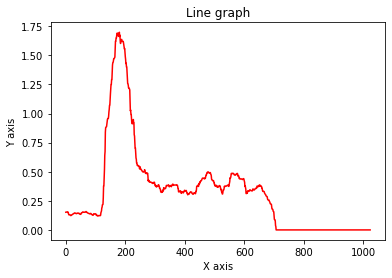

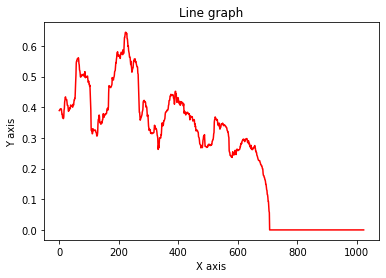

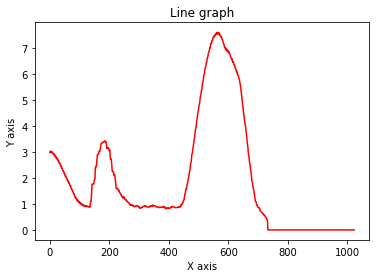

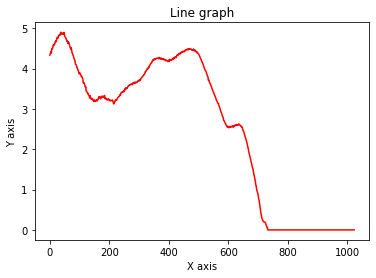

results on model:  CNN
Test Accuracy of the model on 65 samples is: 38.46153846153846%, 25 was correct
results on model:  RNN
Test Accuracy of the model on 65 samples is: 40.0%, 26 was correct
results on model:  IRNN
Test Accuracy of the model on 65 samples is: 30.76923076923077%, 20 was correct
Epoch [1/12000], Step [1/1],Loss of model CNN: 1.0981, lr: 0.000040,Loss of model RNN: 1.0991, lr: 0.000040,Loss of model IRNN: 1.2648, lr: 0.000002
Epoch [21/12000], Step [1/1],Loss of model CNN: 0.9204, lr: 0.000040,Loss of model RNN: 0.9235, lr: 0.000040,Loss of model IRNN: 1.1277, lr: 0.000002
Epoch [41/12000], Step [1/1],Loss of model CNN: 0.6416, lr: 0.000040,Loss of model RNN: 0.6375, lr: 0.000040,Loss of model IRNN: 1.1270, lr: 0.000002
Epoch [61/12000], Step [1/1],Loss of model CNN: 0.4027, lr: 0.000041,Loss of model RNN: 0.3896, lr: 0.000041,Loss of model IRNN: 1.1604, lr: 0.000002
Epoch [81/12000], Step [1/1],Loss of model CNN: 0.1905, lr: 0.000041,Loss of model RNN: 0.1745, lr: 0.00

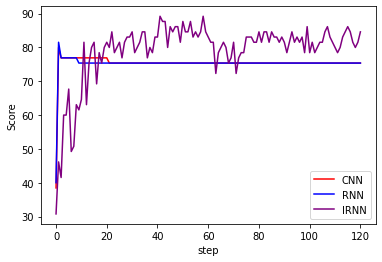

0


In [141]:
#main


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Data transforms (normalization and data augmentation)

train_dataset = load_data(data_dir+'/train')
test_dataset = load_data(data_dir+'/validation')

# Data loader

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

sum=0
for i in range(1):
  #create the model
  model_CNN = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
  model_RNN = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
  model_IRNN = Net(input_size, hidden_size, num_layers).to(device)
  # Loss and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer_CNN = torch.optim.Adam(model_CNN.parameters(), lr=learning_rate)
  optimizer_RNN = torch.optim.Adam(model_RNN.parameters(), lr=learning_rate)
  optimizer_IRNN = torch.optim.Adam(model_IRNN.parameters(), lr=learning_rate)

  # new_train(model,optimizer)

  # Train the model

  # train(test_loader,train_loader,num_epochs,sequence_length,input_size,model,optimizer,max_lr,grad_clip)
  score_A,score_B,score_C=train_test_multi(test_loader,train_loader,num_epochs,sequence_length,input_size,
                     model_CNN,optimizer_CNN,"CNN",
                     max_lr=max_lr,grad_clip=grad_clip,
                     model_B=model_RNN,optimizer_B=optimizer_RNN,model_name_B="RNN",
                     model_C=model_IRNN,optimizer_C=optimizer_IRNN,model_name_C="IRNN")
  # Test the model
  # sum+=testing(model,test_loader)
  create_plot(score_A,"red","CNN")
  create_plot(score_B,"blue","RNN")
  create_plot(score_C,"purple","IRNN")
  plt.legend()
  plt.show()
print(sum)

In [ ]:
D